In [2]:
# K-Nearest Neighbors Classification
# K-nearest neighbors classifier (KNN) is a simple and powerful classification learner.
# KNN has three basic parts:
# 1) yi: The class of an observation (what we are trying to predict in the test data).
# 2) Xi: The predictors/IVs/attributes of an observation.
# 3) K: A positive number specified by the researcher. K denotes the number of observations
# closest to a particular observation that define its “neighborhood”. For example, K=2 means
# that each observation’s has a neighorhood comprising of the two other observations closest
# to it.
# Imagine we have an observation where we know its independent variables xtest but do not 
# know its class ytest. The KNN learner finds the K other observations that are closest to 
# xtest and uses their known classes to assign a classes to test.

*__Preliminaries__*

In [3]:
import pandas as pd
from sklearn import neighbors
import numpy as np
%matplotlib inline  
import seaborn

In [4]:
# Create Dataset
# Here we create three variables, test_1 and test_2 are our
# independent variables, ‘outcome’ is our dependent variable.
# We will use this data to train our learner.

training_data = pd.DataFrame()

training_data['test_1'] = [0.3051,0.4949,0.6974,0.3769,0.2231,0.341,0.4436,0.5897,0.6308,0.5]
training_data['test_2'] = [0.5846,0.2654,0.2615,0.4538,0.4615,0.8308,0.4962,0.3269,0.5346,0.6731]
training_data['outcome'] = ['win','win','win','win','win','loss','loss','loss','loss','loss']

training_data

,test_1,test_2,outcome
0,0.3051,0.5846,win
1,0.4949,0.2654,win
2,0.6974,0.2615,win
3,0.3769,0.4538,win
4,0.2231,0.4615,win
5,0.3410,0.8308,loss
6,0.4436,0.4962,loss
7,0.5897,0.3269,loss
8,0.6308,0.5346,loss
9,0.5000,0.6731,loss


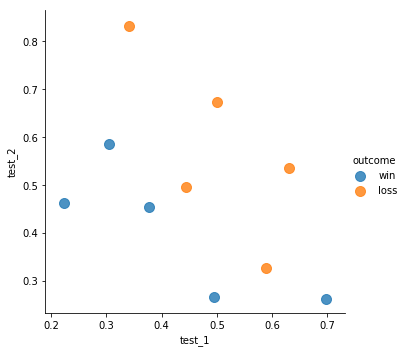

In [7]:
# Plot the data
# This is not necessary, but because we only have three
# variables, we can plot the training dataset. The X and Y
# axes are the independent variables, while the colors of
# the points are their classes.

seaborn.lmplot('test_1', 'test_2', data=training_data, fit_reg=False,hue="outcome", scatter_kws={"marker": "D","s": 100})

In [8]:
# Convert Data Into np.arrays
# The scikit-learn library requires the data be formatted
# as a numpy array. Here are doing that reformatting.

X = training_data.as_matrix(columns=['test_1', 'test_2'])
y = np.array(training_data['outcome'])
print ("X: ",X)
print ("y: ",y)

X:  [[0.3051 0.5846]
 [0.4949 0.2654]
 [0.6974 0.2615]
 [0.3769 0.4538]
 [0.2231 0.4615]
 [0.341  0.8308]
 [0.4436 0.4962]
 [0.5897 0.3269]
 [0.6308 0.5346]
 [0.5    0.6731]]
y:  ['win' 'win' 'win' 'win' 'win' 'loss' 'loss' 'loss' 'loss' 'loss']


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [9]:
# Train The Learner
# We shall train a KNN learner using the
# parameters that an observation’s neighborhood is its three
# closest neighors. weights = 'uniform' can be thought of as 
# the voting system used. For example, uniform means that all
# neighbors get an equally weighted “vote” about an 
# observation’s class while weights = 'distance' would tell 
# the learner to weigh each observation’s “vote” by its
# distance from the observation we are classifying.

In [10]:
clf = neighbors.KNeighborsClassifier(3, weights = 'uniform')
trained_model = clf.fit(X, y)
print ("trained_model: ",trained_model)

trained_model:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


In [12]:
# View The Model’s Score
# How good is our trained model compared to our training 
# data?
trained_model.score(X, y)

0.8

In [9]:
# So our model is 80% accurate!
# Apply The Learner To A New Data Point
# Now that we have trained our model, we can predict the 
# class any new observation, ytest. Let us do that now!

# Create a new observation with the value of the first
# independent variable, 'test_1', as .4 
# and the second independent variable, test_2', as .6 
x_test = np.array([[.4,.6]])

In [10]:
# Apply the learner to the new, unclassified observation.
trained_model.predict(x_test)

array(['loss'], dtype=object)

In [11]:
# We can even look at the probabilities the learner assigned 
# to each class:
trained_model.predict_proba(x_test)

array([[0.66666667, 0.33333333]])

In [12]:
# According to this result, the model predicted that the 
# observation was loss with a ~67% probability and win with 
# a ~33% probability. Because the observation had a greater
# probability of being loss, it predicted that class for the
# observation.

# Notes
# The choice of K has major affects on the classifer created.
# The greater the K, more linear (high bias and low variance)
# the decision boundary.
# There are a variety of ways to measure distance, two 
# popular being simple euclidean distance and 
# cosine similarity.